<a href="https://colab.research.google.com/github/vinayakareddy/Education_comments_analysis/blob/master/Education_comments_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/Colab Notebooks/Political dataset/"

In [0]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [0]:
data = pd.read_csv(path+"education_sentimental analysis.csv", encoding="ISO-8859-1")

data.head()

,Video URL,Nickname,Comments,Classification
0,https://www.youtube.com/watch?v=YvLIPPgkJN8,NANHKURAM SHARMA,Sir bahot badhiya,Praising
1,https://www.youtube.com/watch?v=YvLIPPgkJN8,Chvshprasad,thank you very much sir this class is very hel...,Praising
2,https://www.youtube.com/watch?v=YvLIPPgkJN8,Adarsh Kumar,75,Answers
3,https://www.youtube.com/watch?v=YvLIPPgkJN8,Adarsh Kumar,Sahil sir u are A genius,Praising
4,https://www.youtube.com/watch?v=YvLIPPgkJN8,jyoti kumari,sir RRB Ka kb se state kigyegaa,Neutral


In [0]:
data.drop(['Video URL','Nickname'], axis=1)

,Comments,Classification
0,Sir bahot badhiya,Praising
1,thank you very much sir this class is very hel...,Praising
2,75,Answers
3,Sahil sir u are A genius,Praising
4,sir RRB Ka kb se state kigyegaa,Neutral
...,...,...
9523,sir maths ki class kab lagti h,Query
9524,sir reasoning ki calls kab lagti h,Query
9525,Sir alzebra k kitne parts bnaye h,Query
9526,Sir aap mathe kitne time padhate hai,Query


In [0]:
data.Classification.value_counts()

Query       2382
Praising    2382
Neutral     2382
Answers     2382
Name: Classification, dtype: int64

In [0]:
#Convert tags to integers as most of the machine learning¶
data['target'] = data.Classification.astype('category').cat.codes


In [0]:
#Calculate the number of words in each posts¶
data['num_words'] = data.Comments.apply(lambda x : len(x.split()))

In [0]:
data.head()

,Video URL,Nickname,Comments,Classification,target,num_words
0,https://www.youtube.com/watch?v=YvLIPPgkJN8,NANHKURAM SHARMA,Sir bahot badhiya,Praising,2,3
1,https://www.youtube.com/watch?v=YvLIPPgkJN8,Chvshprasad,thank you very much sir this class is very hel...,Praising,2,12
2,https://www.youtube.com/watch?v=YvLIPPgkJN8,Adarsh Kumar,75,Answers,0,1
3,https://www.youtube.com/watch?v=YvLIPPgkJN8,Adarsh Kumar,Sahil sir u are A genius,Praising,2,6
4,https://www.youtube.com/watch?v=YvLIPPgkJN8,jyoti kumari,sir RRB Ka kb se state kigyegaa,Neutral,1,7


In [0]:
data.drop(['Video URL','Nickname'], axis=1)

,Comments,Classification,target,num_words
0,Sir bahot badhiya,Praising,2,3
1,thank you very much sir this class is very hel...,Praising,2,12
2,75,Answers,0,1
3,Sahil sir u are A genius,Praising,2,6
4,sir RRB Ka kb se state kigyegaa,Neutral,1,7
...,...,...,...,...
9523,sir maths ki class kab lagti h,Query,3,7
9524,sir reasoning ki calls kab lagti h,Query,3,7
9525,Sir alzebra k kitne parts bnaye h,Query,3,7
9526,Sir aap mathe kitne time padhate hai,Query,3,7


In [0]:
#Set number of classes and target variable¶
num_class = len(np.unique(data.Classification.values))
y = data['target'].values

In [0]:
#Tokenize the input¶
MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.Comments.values)
post_seq = tokenizer.texts_to_sequences(data.Comments.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.05)

In [0]:
vocab_size = len(tokenizer.word_index) + 1

# **MODELS**
# Deep Learning Model : Simple


In [0]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=5, callbacks=[checkpointer])

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 500)               0         
_________________________________________________________________
embedding_20 (Embedding)     (None, 500, 128)          552320    
_________________________________________________________________
flatten_8 (Flatten)          (None, 64000)             0         
_________________________________________________________________
dense_130 (Dense)            (None, 32)                2048032   
_________________________________________________________________
dense_131 (Dense)            (None, 4)                 132       
Total params: 2,600,484
Trainable params: 2,600,484
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6788 samples, validate on 2263 samples
Epoch 1/5
6788/6788 [==============================] - 6s 952us/step - loss: 1.1738 - acc: 0.4281 - val_loss: 0.8863 - val_acc: 0.7357

Epoch 00001: val_acc improved from -inf to 0.73575, saving model to weights-simple.hdf5
Epoch 2/5
6788/6788 [==============================] - 6s 949us/step - loss: 0.6178 - acc: 0.7821 - val_loss: 0.4776 - val_acc: 0.8144

Epoch 00002: val_acc improved from 0.73575 to 0.81441, saving model to weights-simple.hdf5
Epoch 3/5
6788/6788 [==============================] - 6s 946us/step - loss: 0.3697 - acc: 0.8645 - val_loss: 0.3938 - val_acc: 0.8462

Epoch 00003: val_acc improved from 0.81441 to 0.84622, saving model to weights-simple.hdf5
Epoch 4/5
6788/6788 [==============================] - 6s 944us/step - loss: 0.2898 - acc: 0.8991 - val_loss: 0.3383 - val_acc: 0.8657

Epoch 00004: val_acc improved from 0.84622 to 0.86567, saving model to weights-simple.hdf5
Epoch 5/5
6788/6788 [==========================

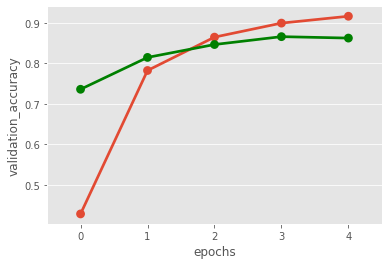

In [0]:
#Understanding the model fit¶
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [0]:
#accuracy
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)

0.870020964360587

# Recurrent Neural Networks


In [0]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model_RNN = Model(inputs=[inputs], outputs=predictions)
model_RNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_RNN.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 500)               0         
_________________________________________________________________
embedding_21 (Embedding)     (None, 500, 128)          552320    
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_132 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_133 (Dense)            (None, 4)                 132       
Total params: 603,940
Trainable params: 603,940
Non-trainable params: 0
_________________________________________________________________


In [0]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model_RNN.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=5, callbacks=[checkpointer])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6788 samples, validate on 2263 samples
Epoch 1/5
6788/6788 [==============================] - 63s 9ms/step - loss: 0.8598 - acc: 0.6383 - val_loss: 0.4581 - val_acc: 0.8153

Epoch 00001: val_acc improved from -inf to 0.81529, saving model to weights.hdf5
Epoch 2/5
6788/6788 [==============================] - 65s 10ms/step - loss: 0.3677 - acc: 0.8558 - val_loss: 0.3427 - val_acc: 0.8630

Epoch 00002: val_acc improved from 0.81529 to 0.86301, saving model to weights.hdf5
Epoch 3/5
6788/6788 [==============================] - 65s 10ms/step - loss: 0.2495 - acc: 0.9041 - val_loss: 0.3463 - val_acc: 0.8639

Epoch 00003: val_acc improved from 0.86301 to 0.86390, saving model to weights.hdf5
Epoch 4/5
6788/6788 [==============================] - 66s 10ms/step - loss: 0.1887 - acc: 0.9247 - val_loss: 0.3308 - val_acc: 0.8776

Epoch 00004: val_acc improved from 0.86390 to 0.87760, saving model to weights.hdf5
Epoch 5/5
6788/6788 [==============================] - 70s 10ms/step - loss:

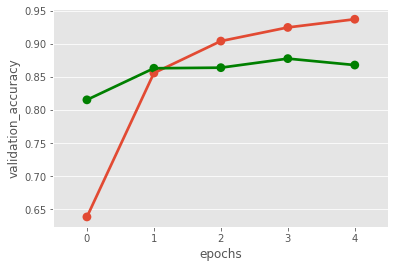

In [0]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [0]:
model_RNN.load_weights('weights.hdf5')
predicted = model_RNN.predict(X_test)
predicted

array([[3.3297614e-04, 6.0826087e-01, 3.9080220e-01, 6.0402794e-04],
       [1.9503482e-04, 2.1066527e-01, 7.8840435e-01, 7.3529524e-04],
       [1.1114709e-05, 1.5656982e-02, 9.8402578e-01, 3.0611249e-04],
       ...,
       [9.9599177e-01, 1.5201123e-03, 2.0982230e-05, 2.4670633e-03],
       [9.3952770e-04, 2.6212206e-01, 1.0438341e-02, 7.2650015e-01],
       [8.0374621e-02, 1.3685054e-01, 8.2127767e-04, 7.8195351e-01]],
      dtype=float32)

In [0]:
#Understanding Softmax¶
predicted = np.argmax(predicted, axis=1)

In [0]:
#Lets look at the accuracy¶
accuracy_score(y_test, predicted)

0.8637316561844863

In [0]:
#We were able to achieve an accuracy score of 88.05% which is pretty good and a huge jump over our simple model.



# Pre-processing for CNN and LSTM

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [0]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each record.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Comments'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 4443 unique tokens.


In [0]:
X = tokenizer.texts_to_sequences(data['Comments'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (9528, 250)


In [0]:
Y = pd.get_dummies(data['Classification']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (9528, 4)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7622, 250) (7622, 4)
(1906, 250) (1906, 4)


# LSTM

In [0]:
model_LSTM = Sequential()
model_LSTM.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model_LSTM.add(SpatialDropout1D(0.2))
model_LSTM.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_LSTM.add(Dense(4, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model_LSTM.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6859 samples, validate on 763 samples
Epoch 1/5
6859/6859 [==============================] - 49s 7ms/step - loss: 0.9219 - accuracy: 0.6018 - val_loss: 0.5120 - val_accuracy: 0.7720
Epoch 2/5
6859/6859 [==============================] - 49s 7ms/step - loss: 0.4275 - accuracy: 0.8335 - val_loss: 0.3803 - val_accuracy: 0.8309
Epoch 3/5
6859/6859 [==============================] - 49s 7ms/step - loss: 0.3023 - accuracy: 0.8813 - val_loss: 0.3162 - val_accuracy: 0.8755
Epoch 4/5
6859/6859 [==============================] - 49s 7ms/step - loss: 0.2358 - accuracy: 0.9061 - val_loss: 0.3002 - val_accuracy: 0.8742
Epoch 5/5
6859/6859 [==============================] - 49s 7ms/step - loss: 0.1987 - accuracy: 0.9203 - val_loss: 0.3115 - val_accuracy: 0.8794


In [0]:
accr = model_LSTM.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1906/1906 [==============================] - 3s 2ms/step
Test set
  Loss: 0.344
  Accuracy: 0.871


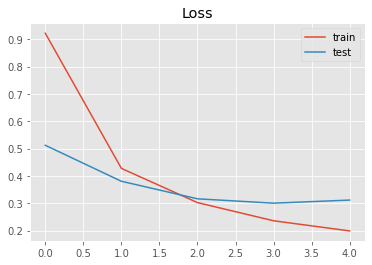

In [0]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

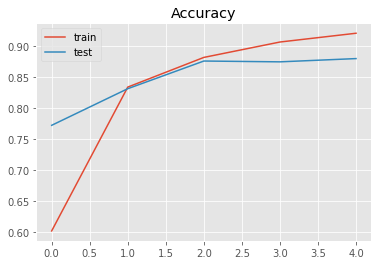

In [0]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [0]:
new_complaint = ['Sir bahot badhiya']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model_LSTM.predict(padded)
labels = ['Praising','Answers','Neutral','Query']
print(pred, labels[np.argmax(pred)])

[[5.0739232e-05 4.2161155e-02 9.5729470e-01 4.9334316e-04]] Neutral


# CNN LSTM

In [0]:
model_CNN = Sequential()
model_CNN.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model_CNN.add(Conv1D(64, kernel_size=5, activation='relu')) #64 * 64 # 128 * 128 5 FILTERS i/p - 10 filters +1 = 491
model_CNN.add(MaxPooling1D(pool_size=4)) # 4 LAYERS OF POOLING
model_CNN.add(Conv1D(64, kernel_size=2, activation='relu'))
model_CNN.add(MaxPooling1D(pool_size=4))
model_CNN.add(SpatialDropout1D(0.2))
model_CNN.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_CNN.add(Dense(4, activation='softmax'))
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model_CNN.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6859 samples, validate on 763 samples
Epoch 1/5
6859/6859 [==============================] - 21s 3ms/step - loss: 1.1621 - accuracy: 0.4576 - val_loss: 0.9114 - val_accuracy: 0.6068
Epoch 2/5
6859/6859 [==============================] - 21s 3ms/step - loss: 0.8040 - accuracy: 0.6742 - val_loss: 0.7489 - val_accuracy: 0.7221
Epoch 3/5
6859/6859 [==============================] - 21s 3ms/step - loss: 0.6485 - accuracy: 0.7501 - val_loss: 0.7064 - val_accuracy: 0.7353
Epoch 4/5
6859/6859 [==============================] - 21s 3ms/step - loss: 0.5698 - accuracy: 0.7806 - val_loss: 0.6741 - val_accuracy: 0.7457
Epoch 5/5
6859/6859 [==============================] - 21s 3ms/step - loss: 0.5316 - accuracy: 0.7918 - val_loss: 0.6458 - val_accuracy: 0.7575


In [0]:
accr = model_CNN.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1906/1906 [==============================] - 1s 550us/step
Test set
  Loss: 0.650
  Accuracy: 0.752


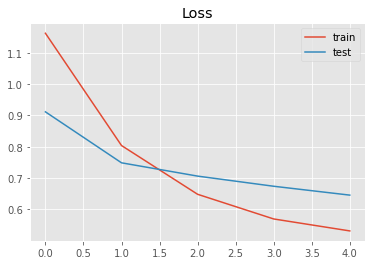

In [0]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

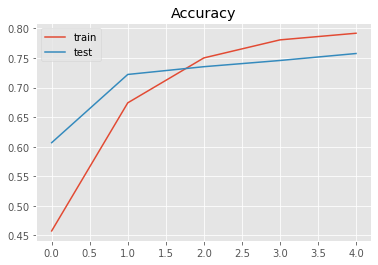

In [0]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [0]:
new_complaint = ['Sir bahot badhiya']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model_CNN.predict(padded)
labels = ['Praising','Answers','Neutral','Query']
print(pred, labels[np.argmax(pred)])

[[0.0305353  0.76279527 0.17689677 0.02977265]] Answers


# **MultiLayer Perceptron using TF-IDF vectorization**

In [0]:
import nltk
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
punc = ['.', ',', '"', "'", '?','??', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'???']
stop_words= punc

len(stop_words)
#stop_words

17

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

stemmer = SnowballStemmer('english')

wordnet_lemmatizer = WordNetLemmatizer()
    
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

   
  
def tokenize(text):
  wordlist= []
  for word in tokenizer.tokenize(text.lower()):
    wordlist.append(word) 
    #wordlisy.append(stemmer.stem(word))
  return wordlist

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
vectorizer = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 5300,ngram_range=(1,5), lowercase= True)
tfdf = vectorizer.fit_transform(data.Comments)
words = vectorizer.get_feature_names()

In [0]:
from sklearn.model_selection import train_test_split
y= data.Classification
X_train, X_test, y_train, y_test = train_test_split( tfdf, y, test_size=0.2, random_state=42)

In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
mlp = Sequential()
mlp.add(Dense(500, input_dim=5300, activation='relu'))
mlp.add(Dropout(0.1))
mlp.add(Dense(550, activation='relu'))
mlp.add(Dropout(0.1))

mlp.add(Dense(100, activation='relu'))
mlp.add(Dropout(0.1))

mlp.add(Dense(10, activation='relu'))
mlp.add(Dropout(0.1))


mlp.add(Dense(4, activation='sigmoid'))

# Compile model
from keras import optimizers
opt =optimizers.adamax(lr=0.001)
mlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(mlp.summary())

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 500)               2650500   
_________________________________________________________________
dropout_85 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_142 (Dense)            (None, 550)               275550    
_________________________________________________________________
dropout_86 (Dropout)         (None, 550)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 100)               55100     
_________________________________________________________________
dropout_87 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_144 (Dense)            (None, 10)              

In [0]:
import time
start_time = time.clock()

# Fit the model
mlp.fit(X_train, Y_train, epochs=5, batch_size=150 )


Epoch 1/5
7622/7622 [==============================] - 4s 481us/step - loss: 1.2704 - accuracy: 0.3431
Epoch 2/5
7622/7622 [==============================] - 3s 453us/step - loss: 1.0412 - accuracy: 0.6839
Epoch 3/5
7622/7622 [==============================] - 3s 449us/step - loss: 0.9339 - accuracy: 0.7495
Epoch 4/5
7622/7622 [==============================] - 3s 459us/step - loss: 0.8096 - accuracy: 0.8252
Epoch 5/5
7622/7622 [==============================] - 3s 455us/step - loss: 0.6997 - accuracy: 0.8592


In [0]:
accr = mlp.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1906/1906 [==============================] - 0s 256us/step
Test set
  Loss: 0.672
  Accuracy: 0.853


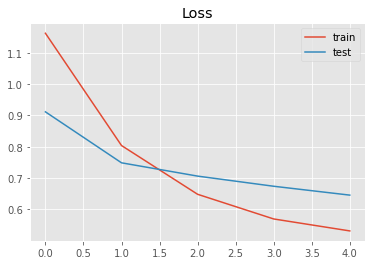

In [0]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

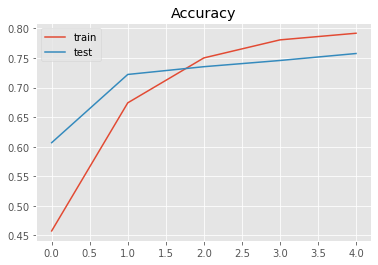

In [0]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [0]:
from keras.preprocessing.text import Tokenizer

new_complaint = ['Sir bahot badhiya']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = mlp.predict(padded)
labels = ['Praising','Answers','Neutral','Query']
print(pred, labels[np.argmax(pred)])

AttributeError: ignored